<a href="https://colab.research.google.com/github/mamoan/NOVA_DL_home_exercise/blob/main/9_eval_domain_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path_to_predicted_list1 = ["/content/drive/MyDrive/NOVA_course_home_exercise/data/tiles/10m_galbyveien_20230504_sun", "/content/drive/MyDrive/NOVA_course_home_exercise/data/tiles/10m_braatan_40m_20230605_sun", "/content/drive/MyDrive/NOVA_course_home_exercise/data/tiles/10m_krakstad_202304_sun", "/content/drive/MyDrive/NOVA_course_home_exercise/data/tiles/10m_ortho_hobol_042222_mavic_sun"]
# predictions = [path_to_predicted_list1[0]+"/galbyveien_20230504_sun_tile_index.shp", path_to_predicted_list1[1]+"/braatan_40m_20230605_sun_tile_index.shp", path_to_predicted_list1[2]+"/krakstad_202304_sun_tile_index.shp", path_to_predicted_list1[3]+"/ortho_hobol_042222_mavic_sun_tile_index.shp"]
predictions = [path_to_predicted_list1[0]+"/10m_galbyveien_20230504_sun_predictions_AM.shp", path_to_predicted_list1[1]+"/10m_braatan_40m_20230605_sun_predictions_AM.shp", path_to_predicted_list1[2]+"/10m_krakstad_202304_sun_predictions_AM.shp", path_to_predicted_list1[3]+"/10m_ortho_hobol_042222_mavic_sun_predictions_AM.shp"]
predictions_small = [path_to_predicted_list1[0]+"/10m_galbyveien_20230504_sun_predictions_small_AM.shp", path_to_predicted_list1[1]+"/10m_braatan_40m_20230605_sun_predictions_small_AM.shp", path_to_predicted_list1[2]+"/10m_krakstad_202304_sun_predictions_small_AM.shp", path_to_predicted_list1[3]+"/10m_ortho_hobol_042222_mavic_sun_predictions_small_AM.shp"]

In [ ]:
pred_boxes = [None] * 4

In [ ]:
# Read files
pred_boxes = [gpd.read_file(predictions[i]) for i in range(4)]
pred_boxes_small = [gpd.read_file(predictions_small[i]) for i in range(4)]
ref_boxes = gpd.read_file('/content/drive/MyDrive/NOVA_course_home_exercise/data/map_data/test_annotations2_sun.geojson')

# read aois. AOIs were created for the different study sites in QGiS by saving a selection from the test_plots.geojson. This was done in order to get correct per ha values for each site.
aois = gpd.read_file('/content/drive/MyDrive/NOVA_course_home_exercise/data/map_data/aois.geojson') # this aoi is only for the area galbyveien
aois_braatan = gpd.read_file('/content/drive/MyDrive/NOVA_course_home_exercise/data/map_data/aois_braatan.geojson') # these aois are for areas braatan, krakstad, and hobol
aois_krakstad = gpd.read_file('/content/drive/MyDrive/NOVA_course_home_exercise/data/map_data/aois_krakstad.geojson')
aois_hobol = gpd.read_file('/content/drive/MyDrive/NOVA_course_home_exercise/data/map_data/aois_hobol.geojson')

In [ ]:
pred_boxes_galby = pred_boxes[0]
pred_boxes_braatan = pred_boxes[1]
pred_boxes_krakstad = pred_boxes[2]
pred_boxes_hobol = pred_boxes[3]

pred_boxes_galby_small = pred_boxes_small[0]
pred_boxes_braatan_small = pred_boxes_small[1]
pred_boxes_krakstad_small = pred_boxes_small[2]
pred_boxes_hobol_small = pred_boxes_small[3]

# For galbyveien

## Full model

In [ ]:
# Initialize lists to store the number of boxes per hectare for each AOI
box_density = []

# Compute the number of boxes per hectare for each AOI
for aoi in aois.iterrows():
    aoi_geom = aoi[1].geometry
    pred_within_aoi = pred_boxes_galby[pred_boxes_galby.geometry.within(aoi_geom)]
    ref_within_aoi = ref_boxes[ref_boxes.geometry.within(aoi_geom)]

    area = aoi_geom.area  # Area in square meters
    area_ha = area / 10000  # Convert area to hectares
    num_pred_within_aoi = len(pred_within_aoi)
    num_ref_within_aoi = len(ref_within_aoi)

    pred_density = num_pred_within_aoi / area_ha
    ref_density = num_ref_within_aoi / area_ha

    box_density.append((pred_density, ref_density))

In [ ]:
# Print box density for each AOI
for i, aoi in enumerate(aois.iterrows()):
    aoi_name = aoi[1]['aoi_name']  # Assuming you have a column 'aoi_name' in your AOIs shapefile
    pred_density, ref_density = box_density[i]
    print("Box density for AOI"+ str(aoi_name) + ":")
    print("Predicted density (boxes/ha):"+ str(pred_density))
    print("Reference density (boxes/ha):"+ str(ref_density))
    print()

Box density for AOInan:
Predicted density (boxes/ha):1783.753115909151
Reference density (boxes/ha):2294.555144555862

Box density for AOInan:
Predicted density (boxes/ha):1829.9581842022126
Reference density (boxes/ha):2257.5185076139446

Box density for AOInan:
Predicted density (boxes/ha):1402.511255242128
Reference density (boxes/ha):1346.0883886519275

Box density for AOInan:
Predicted density (boxes/ha):2113.0103428451816
Reference density (boxes/ha):2206.2313873824687



In [ ]:
# Compute RMSE of box density
pred_densities, ref_densities = zip(*box_density)
residuals = np.array(pred_densities) - np.array(ref_densities)
rmse = np.sqrt(np.mean(np.power(residuals, 2)))
bias = np.mean(residuals)

rmse_rel= rmse/np.mean(ref_densities)*100
bias_rel= bias/np.mean(ref_densities)*100

print("RMSE of box density (boxes/ha):"+ str(rmse))
print("bias of box density (boxes/ha):"+ str(bias))

print("RMSE of box density (%):"+ str(rmse_rel))
print("bias of box density (%):"+ str(bias_rel))

RMSE of box density (boxes/ha):337.4908315956224
bias of box density (boxes/ha):-243.79013250138246
RMSE of box density (%):16.657179076283054
bias of box density (%):-12.032492482557192


## Small model

In [ ]:
# Initialize lists to store the number of boxes per hectare for each AOI
box_density = []

# Compute the number of boxes per hectare for each AOI
for aoi in aois.iterrows():
    aoi_geom = aoi[1].geometry
    pred_within_aoi = pred_boxes_galby_small[pred_boxes_galby_small.geometry.within(aoi_geom)]
    ref_within_aoi = ref_boxes[ref_boxes.geometry.within(aoi_geom)]

    area = aoi_geom.area  # Area in square meters
    area_ha = area / 10000  # Convert area to hectares
    num_pred_within_aoi = len(pred_within_aoi)
    num_ref_within_aoi = len(ref_within_aoi)

    pred_density = num_pred_within_aoi / area_ha
    ref_density = num_ref_within_aoi / area_ha

    box_density.append((pred_density, ref_density))

In [ ]:
# Print box density for each AOI
for i, aoi in enumerate(aois.iterrows()):
    aoi_name = aoi[1]['aoi_name']  # Assuming you have a column 'aoi_name' in your AOIs shapefile
    pred_density, ref_density = box_density[i]
    print("Box density for AOI"+ str(aoi_name) + ":")
    print("Predicted density (boxes/ha):"+ str(pred_density))
    print("Reference density (boxes/ha):"+ str(ref_density))

Box density for AOInan:
Predicted density (boxes/ha):3494.5345134402
Reference density (boxes/ha):2294.555144555862
Box density for AOInan:
Predicted density (boxes/ha):3796.735671896179
Reference density (boxes/ha):2257.5185076139446
Box density for AOInan:
Predicted density (boxes/ha):3417.6136334635767
Reference density (boxes/ha):1346.0883886519275
Box density for AOInan:
Predicted density (boxes/ha):4623.763809049456
Reference density (boxes/ha):2206.2313873824687


In [ ]:
# Compute RMSE of box density
pred_densities, ref_densities = zip(*box_density)
residuals = np.array(pred_densities) - np.array(ref_densities)
rmse = np.sqrt(np.mean(np.power(residuals, 2)))
bias = np.mean(residuals)

rmse_rel= rmse/np.mean(ref_densities)*100
bias_rel= bias/np.mean(ref_densities)*100

print("RMSE of box density (boxes/ha):"+ str(rmse))
print("bias of box density (boxes/ha):"+ str(bias))

print("RMSE of box density (%):"+ str(rmse_rel))
print("bias of box density (%):"+ str(bias_rel))

RMSE of box density (boxes/ha):1867.1381720611967
bias of box density (boxes/ha):1807.063549911302
RMSE of box density (%):92.1543697798947
bias of box density (%):89.18933000574809


# For braatan

## Full model

In [ ]:
# Initialize lists to store the number of boxes per hectare for each AOI
box_density = []

# Compute the number of boxes per hectare for each AOI
for aoi in aois_braatan.iterrows():
    aoi_geom = aoi[1].geometry
    pred_within_aoi = pred_boxes_braatan[pred_boxes_braatan.geometry.within(aoi_geom)]
    ref_within_aoi = ref_boxes[ref_boxes.geometry.within(aoi_geom)]

    area = aoi_geom.area  # Area in square meters
    area_ha = area / 10000  # Convert area to hectares
    num_pred_within_aoi = len(pred_within_aoi)
    num_ref_within_aoi = len(ref_within_aoi)

    pred_density = num_pred_within_aoi / area_ha
    ref_density = num_ref_within_aoi / area_ha

    box_density.append((pred_density, ref_density))

In [ ]:
# Print box density for each AOI
for i, aoi in enumerate(aois_braatan.iterrows()):
    aoi_name = aoi[1]['aoi_name']  # Assuming you have a column 'aoi_name' in your AOIs shapefile
    pred_density, ref_density = box_density[i]
    print("Box density for AOI"+ str(aoi_name) + ":")
    print("Predicted density (boxes/ha):"+ str(pred_density))
    print("Reference density (boxes/ha):"+ str(ref_density))
    print()

Box density for AOIbraatan2:
Predicted density (boxes/ha):592.8515322947363
Reference density (boxes/ha):946.650027373853

Box density for AOIbraatan2:
Predicted density (boxes/ha):581.8922220142953
Reference density (boxes/ha):1174.5602259177442

Box density for AOIbraatan1:
Predicted density (boxes/ha):981.7924773915759
Reference density (boxes/ha):2189.2843748731693

Box density for AOIbraatan1:
Predicted density (boxes/ha):706.7809595698628
Reference density (boxes/ha):1531.3587457347028



In [ ]:
# Compute RMSE of box density
pred_densities, ref_densities = zip(*box_density)
residuals = np.array(pred_densities) - np.array(ref_densities)
rmse = np.sqrt(np.mean(np.power(residuals, 2)))
bias = np.mean(residuals)

rmse_rel= rmse/np.mean(ref_densities)*100
bias_rel= bias/np.mean(ref_densities)*100

print("RMSE of box density (boxes/ha):"+ str(rmse))
print("bias of box density (boxes/ha):"+ str(bias))

print("RMSE of box density (%):"+ str(rmse_rel))
print("bias of box density (%):"+ str(bias_rel))

RMSE of box density (boxes/ha):808.4543811946587
bias of box density (boxes/ha):-744.6340456572498
RMSE of box density (%):55.356020047111244
bias of box density (%):-50.98615100366358


## Small model

In [ ]:
# Initialize lists to store the number of boxes per hectare for each AOI
box_density = []

# Compute the number of boxes per hectare for each AOI
for aoi in aois_braatan.iterrows():
    aoi_geom = aoi[1].geometry
    pred_within_aoi = pred_boxes_braatan_small[pred_boxes_braatan_small.geometry.within(aoi_geom)]
    ref_within_aoi = ref_boxes[ref_boxes.geometry.within(aoi_geom)]

    area = aoi_geom.area  # Area in square meters
    area_ha = area / 10000  # Convert area to hectares
    num_pred_within_aoi = len(pred_within_aoi)
    num_ref_within_aoi = len(ref_within_aoi)

    pred_density = num_pred_within_aoi / area_ha
    ref_density = num_ref_within_aoi / area_ha

    box_density.append((pred_density, ref_density))

In [ ]:
# Print box density for each AOI
for i, aoi in enumerate(aois_braatan.iterrows()):
    aoi_name = aoi[1]['aoi_name']  # Assuming you have a column 'aoi_name' in your AOIs shapefile
    pred_density, ref_density = box_density[i]
    print("Box density for AOI"+ str(aoi_name) + ":")
    print("Predicted density (boxes/ha):"+ str(pred_density))
    print("Reference density (boxes/ha):"+ str(ref_density))
    print()

Box density for AOIbraatan2:
Predicted density (boxes/ha):1061.3954852373504
Reference density (boxes/ha):946.650027373853

Box density for AOIbraatan2:
Predicted density (boxes/ha):678.8742590166779
Reference density (boxes/ha):1174.5602259177442

Box density for AOIbraatan1:
Predicted density (boxes/ha):2730.9629830892113
Reference density (boxes/ha):2189.2843748731693

Box density for AOIbraatan1:
Predicted density (boxes/ha):1488.523536063802
Reference density (boxes/ha):1531.3587457347028



In [ ]:
# Compute RMSE of box density
pred_densities, ref_densities = zip(*box_density)
residuals = np.array(pred_densities) - np.array(ref_densities)
rmse = np.sqrt(np.mean(np.power(residuals, 2)))
bias = np.mean(residuals)

rmse_rel= rmse/np.mean(ref_densities)*100
bias_rel= bias/np.mean(ref_densities)*100

print("RMSE of box density (boxes/ha):"+ str(rmse))
print("bias of box density (boxes/ha):"+ str(bias))

print("RMSE of box density (%):"+ str(rmse_rel))
print("bias of box density (%):"+ str(bias_rel))

RMSE of box density (boxes/ha):372.1967449042801
bias of box density (boxes/ha):29.47572237689309
RMSE of box density (%):25.484839901473716
bias of box density (%):2.018244587143267


# For krakstad

## Full model

In [ ]:
# Initialize lists to store the number of boxes per hectare for each AOI
box_density = []

# Compute the number of boxes per hectare for each AOI
for aoi in aois_krakstad.iterrows():
    aoi_geom = aoi[1].geometry
    pred_within_aoi = pred_boxes_krakstad[pred_boxes_krakstad.geometry.within(aoi_geom)]
    ref_within_aoi = ref_boxes[ref_boxes.geometry.within(aoi_geom)]

    area = aoi_geom.area  # Area in square meters
    area_ha = area / 10000  # Convert area to hectares
    num_pred_within_aoi = len(pred_within_aoi)
    num_ref_within_aoi = len(ref_within_aoi)

    pred_density = num_pred_within_aoi / area_ha
    ref_density = num_ref_within_aoi / area_ha

    box_density.append((pred_density, ref_density))

In [ ]:
# Print box density for each AOI
for i, aoi in enumerate(aois_krakstad.iterrows()):
    aoi_name = aoi[1]['aoi_name']  # Assuming you have a column 'aoi_name' in your AOIs shapefile
    pred_density, ref_density = box_density[i]
    print("Box density for AOI"+ str(aoi_name) + ":")
    print("Predicted density (boxes/ha):"+ str(pred_density))
    print("Reference density (boxes/ha):"+ str(ref_density))
    print()

Box density for AOIkrakstad:
Predicted density (boxes/ha):1169.409727590753
Reference density (boxes/ha):1540.1981778024551

Box density for AOIkrakstad:
Predicted density (boxes/ha):978.0336038503006
Reference density (boxes/ha):1316.5836974907893

Box density for AOIkrakstad:
Predicted density (boxes/ha):1010.0537113038579
Reference density (boxes/ha):1246.047569085133

Box density for AOIkrakstad:
Predicted density (boxes/ha):1068.0225344791468
Reference density (boxes/ha):1175.7222858551952



In [ ]:
# Compute RMSE of box density
pred_densities, ref_densities = zip(*box_density)
residuals = np.array(pred_densities) - np.array(ref_densities)
rmse = np.sqrt(np.mean(np.power(residuals, 2)))
bias = np.mean(residuals)

rmse_rel= rmse/np.mean(ref_densities)*100
bias_rel= bias/np.mean(ref_densities)*100

print("RMSE of box density (boxes/ha):"+ str(rmse))
print("bias of box density (boxes/ha):"+ str(bias))

print("RMSE of box density (%):"+ str(rmse_rel))
print("bias of box density (%):"+ str(bias_rel))

RMSE of box density (boxes/ha):282.5741398603785
bias of box density (boxes/ha):-263.25803825237864
RMSE of box density (%):21.413005256112154
bias of box density (%):-19.949262730118562


## Small model

In [ ]:
aois_krakstad.iterrows()

<generator object DataFrame.iterrows at 0x7f8aa807f6f0>

In [ ]:
# Initialize lists to store the number of boxes per hectare for each AOI
box_density = []

# Compute the number of boxes per hectare for each AOI
for aoi in aois_krakstad.iterrows():
    aoi_geom = aoi[1].geometry
    pred_within_aoi = pred_boxes_krakstad_small[pred_boxes_krakstad_small.geometry.within(aoi_geom)]
    ref_within_aoi = ref_boxes[ref_boxes.geometry.within(aoi_geom)]

    area = aoi_geom.area  # Area in square meters
    area_ha = area / 10000  # Convert area to hectares
    num_pred_within_aoi = len(pred_within_aoi)
    num_ref_within_aoi = len(ref_within_aoi)

    pred_density = num_pred_within_aoi / area_ha
    ref_density = num_ref_within_aoi / area_ha

    box_density.append((pred_density, ref_density))

In [ ]:
# Print box density for each AOI
for i, aoi in enumerate(aois_krakstad.iterrows()):
    aoi_name = aoi[1]['aoi_name']  # Assuming you have a column 'aoi_name' in your AOIs shapefile
    pred_density, ref_density = box_density[i]
    print("Box density for AOI"+ str(aoi_name) + ":")
    print("Predicted density (boxes/ha):"+ str(pred_density))
    print("Reference density (boxes/ha):"+ str(ref_density))
    print()

Box density for AOIkrakstad:
Predicted density (boxes/ha):1635.2721393951992
Reference density (boxes/ha):1540.1981778024551

Box density for AOIkrakstad:
Predicted density (boxes/ha):1401.2212209009115
Reference density (boxes/ha):1316.5836974907893

Box density for AOIkrakstad:
Predicted density (boxes/ha):1425.4029009989024
Reference density (boxes/ha):1246.047569085133

Box density for AOIkrakstad:
Predicted density (boxes/ha):1714.221042735437
Reference density (boxes/ha):1175.7222858551952



In [ ]:
# Compute RMSE of box density
pred_densities, ref_densities = zip(*box_density)
residuals = np.array(pred_densities) - np.array(ref_densities)
rmse = np.sqrt(np.mean(np.power(residuals, 2)))
bias = np.mean(residuals)

rmse_rel= rmse/np.mean(ref_densities)*100
bias_rel= bias/np.mean(ref_densities)*100

print("RMSE of box density (boxes/ha):"+ str(rmse))
print("bias of box density (boxes/ha):"+ str(bias))

print("RMSE of box density (%):"+ str(rmse_rel))
print("bias of box density (%):"+ str(bias_rel))

RMSE of box density (boxes/ha):290.8400826869475
bias of box density (boxes/ha):224.39139344921938
RMSE of box density (%):22.03938485786729
bias of box density (%):17.00401207884271


# For hobol

## Full model

In [ ]:
# Initialize lists to store the number of boxes per hectare for each AOI
box_density = []

# Compute the number of boxes per hectare for each AOI
for aoi in aois_hobol.iterrows():
    aoi_geom = aoi[1].geometry
    pred_within_aoi = pred_boxes_hobol[pred_boxes_hobol.geometry.within(aoi_geom)]
    ref_within_aoi = ref_boxes[ref_boxes.geometry.within(aoi_geom)]

    area = aoi_geom.area  # Area in square meters
    area_ha = area / 10000  # Convert area to hectares
    num_pred_within_aoi = len(pred_within_aoi)
    num_ref_within_aoi = len(ref_within_aoi)

    pred_density = num_pred_within_aoi / area_ha
    ref_density = num_ref_within_aoi / area_ha

    box_density.append((pred_density, ref_density))

In [ ]:
# Print box density for each AOI
for i, aoi in enumerate(aois_hobol.iterrows()):
    aoi_name = aoi[1]['aoi_name']  # Assuming you have a column 'aoi_name' in your AOIs shapefile
    pred_density, ref_density = box_density[i]
    print("Box density for AOI"+ str(aoi_name) + ":")
    print("Predicted density (boxes/ha):"+ str(pred_density))
    print("Reference density (boxes/ha):"+ str(ref_density))
    print()

Box density for AOIhobol:
Predicted density (boxes/ha):844.2449062194645
Reference density (boxes/ha):1029.7932372567095

Box density for AOIhobol:
Predicted density (boxes/ha):1096.8466479547953
Reference density (boxes/ha):1169.3654345964346

Box density for AOIhobol:
Predicted density (boxes/ha):957.7453301916349
Reference density (boxes/ha):1021.5950188710773

Box density for AOIhobol:
Predicted density (boxes/ha):1032.65237290456
Reference density (boxes/ha):1119.5109837096165



In [ ]:
# Compute RMSE of box density
pred_densities, ref_densities = zip(*box_density)
residuals = np.array(pred_densities) - np.array(ref_densities)
rmse = np.sqrt(np.mean(np.power(residuals, 2)))
bias = np.mean(residuals)

rmse_rel= rmse/np.mean(ref_densities)*100
bias_rel= bias/np.mean(ref_densities)*100

print("RMSE of box density (boxes/ha):"+ str(rmse))
print("bias of box density (boxes/ha):"+ str(bias))

print("RMSE of box density (%):"+ str(rmse_rel))
print("bias of box density (%):"+ str(bias_rel))

RMSE of box density (boxes/ha):113.25674216368827
bias of box density (boxes/ha):-102.19385429084579
RMSE of box density (%):10.437772869550814
bias of box density (%):-9.418214045130911


## Small model

In [ ]:
# Initialize lists to store the number of boxes per hectare for each AOI
box_density = []

# Compute the number of boxes per hectare for each AOI
for aoi in aois_hobol.iterrows():
    aoi_geom = aoi[1].geometry
    pred_within_aoi = pred_boxes_hobol_small[pred_boxes_hobol_small.geometry.within(aoi_geom)]
    ref_within_aoi = ref_boxes[ref_boxes.geometry.within(aoi_geom)]

    area = aoi_geom.area  # Area in square meters
    area_ha = area / 10000  # Convert area to hectares
    num_pred_within_aoi = len(pred_within_aoi)
    num_ref_within_aoi = len(ref_within_aoi)

    pred_density = num_pred_within_aoi / area_ha
    ref_density = num_ref_within_aoi / area_ha

    box_density.append((pred_density, ref_density))

In [ ]:
# Print box density for each AOI
for i, aoi in enumerate(aois_hobol.iterrows()):
    aoi_name = aoi[1]['aoi_name']  # Assuming you have a column 'aoi_name' in your AOIs shapefile
    pred_density, ref_density = box_density[i]
    print("Box density for AOI"+ str(aoi_name) + ":")
    print("Predicted density (boxes/ha):"+ str(pred_density))
    print("Reference density (boxes/ha):"+ str(ref_density))
    print()

Box density for AOIhobol:
Predicted density (boxes/ha):927.7416551862248
Reference density (boxes/ha):1029.7932372567095

Box density for AOIhobol:
Predicted density (boxes/ha):1223.7545245776641
Reference density (boxes/ha):1169.3654345964346

Box density for AOIhobol:
Predicted density (boxes/ha):1295.236541782973
Reference density (boxes/ha):1021.5950188710773

Box density for AOIhobol:
Predicted density (boxes/ha):1573.1059512471336
Reference density (boxes/ha):1119.5109837096165



In [ ]:
# Compute RMSE of box density
pred_densities, ref_densities = zip(*box_density)
residuals = np.array(pred_densities) - np.array(ref_densities)
rmse = np.sqrt(np.mean(np.power(residuals, 2)))
bias = np.mean(residuals)

rmse_rel= rmse/np.mean(ref_densities)*100
bias_rel= bias/np.mean(ref_densities)*100

print("RMSE of box density (boxes/ha):"+ str(rmse))
print("bias of box density (boxes/ha):"+ str(bias))

print("RMSE of box density (%):"+ str(rmse_rel))
print("bias of box density (%):"+ str(bias_rel))

RMSE of box density (boxes/ha):271.1091920928622
bias of box density (boxes/ha):169.8934995900394
RMSE of box density (%):24.98549857475932
bias of box density (%):15.65743219216934


# Making a scatterplot of predicted vs reference



## Galbyveien

In [ ]:
for aoi in aois.iterrows():
    aoi_geom = aoi[1].geometry
    pred_within_aoi = pred_boxes_galby[pred_boxes_galby.geometry.within(aoi_geom)]
    pred_within_aoi_small = pred_boxes_galby_small[pred_boxes_galby_small.geometry.within(aoi_geom)]
    ref_within_aoi = ref_boxes[ref_boxes.geometry.within(aoi_geom)]

In [ ]:
pred_within_aoi = pred_within_aoi.assign(category = "prediction", model = "full")
pred_within_aoi_small = pred_within_aoi_small.assign(category = "prediction_small", model = "small")
ref_within_aoi = ref_within_aoi.assign(category = "reference", model = "")

In [ ]:
df_galby_full = pd.concat([pred_within_aoi, ref_within_aoi])
df_galby_small = pd.concat([pred_within_aoi_small, ref_within_aoi])

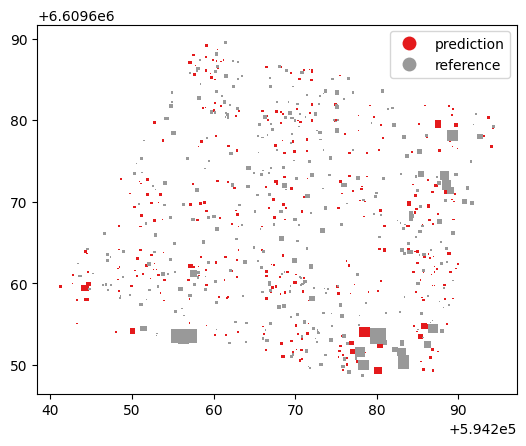

In [ ]:
# Scatter plot with colored points based on the attribute column
df_galby_full.plot(column = "category", markersize = 1, cmap = "Set1", legend = True)

# Show the plot
plt.show()

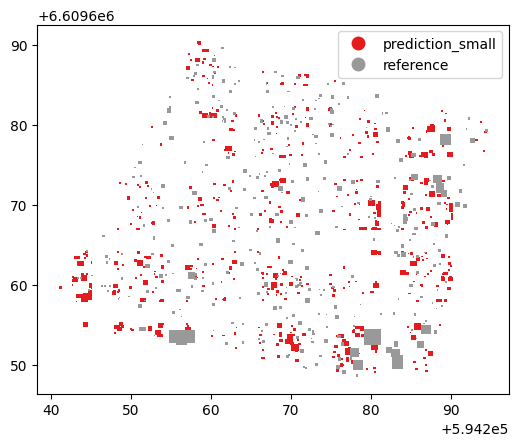

In [ ]:
# Scatter plot with colored points based on the attribute column
df_galby_small.plot(column = "category", markersize = 1, cmap = "Set1", legend = True)

# Show the plot
plt.show()

## Braatan

In [ ]:
for aoi in aois_braatan.iterrows():
    aoi_geom = aoi[1].geometry
    pred_within_aoi = pred_boxes_braatan[pred_boxes_braatan.geometry.within(aoi_geom)]
    pred_within_aoi_small = pred_boxes_braatan_small[pred_boxes_braatan_small.geometry.within(aoi_geom)]
    ref_within_aoi = ref_boxes[ref_boxes.geometry.within(aoi_geom)]

In [ ]:
pred_within_aoi = pred_within_aoi.assign(category = "prediction", model = "full")
pred_within_aoi_small = pred_within_aoi_small.assign(category = "prediction_small", model = "small")
ref_within_aoi = ref_within_aoi.assign(category = "reference", model = "")

In [ ]:
df_braatan_full = pd.concat([pred_within_aoi, ref_within_aoi])
df_braatan_small = pd.concat([pred_within_aoi_small, ref_within_aoi])

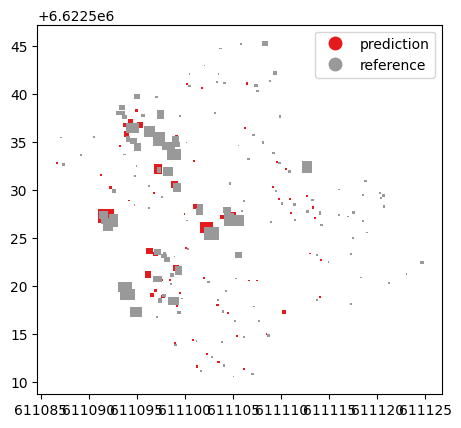

In [ ]:
# Scatter plot with colored points based on the attribute column
df_braatan_full.plot(column = "category", markersize = 1, cmap = "Set1", legend = True)

# Show the plot
plt.show()

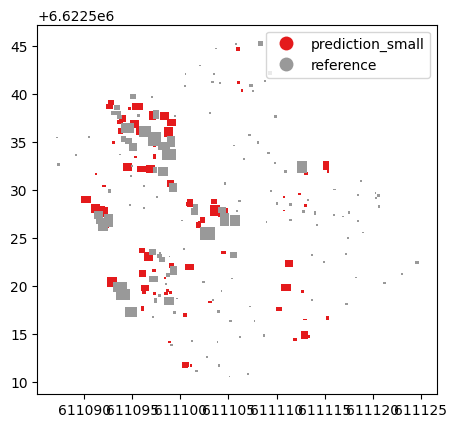

In [ ]:
# Scatter plot with colored points based on the attribute column
df_braatan_small.plot(column = "category", markersize = 1, cmap = "Set1", legend = True)

# Show the plot
plt.show()

## Krakstad

In [ ]:
for aoi in aois_krakstad.iterrows():
    aoi_geom = aoi[1].geometry
    pred_within_aoi = pred_boxes_krakstad[pred_boxes_krakstad.geometry.within(aoi_geom)]
    pred_within_aoi_small = pred_boxes_krakstad_small[pred_boxes_krakstad_small.geometry.within(aoi_geom)]
    ref_within_aoi = ref_boxes[ref_boxes.geometry.within(aoi_geom)]

In [ ]:
pred_within_aoi = pred_within_aoi.assign(category = "prediction", model = "full")
pred_within_aoi_small = pred_within_aoi_small.assign(category = "prediction_small", model = "small")
ref_within_aoi = ref_within_aoi.assign(category = "reference", model = "")

In [ ]:
df_krakstad_full = pd.concat([pred_within_aoi, ref_within_aoi])
df_krakstad_small = pd.concat([pred_within_aoi_small, ref_within_aoi])

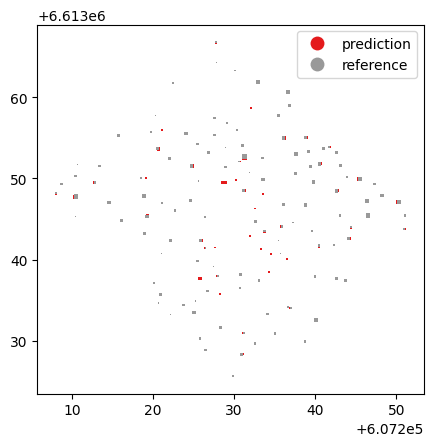

In [ ]:
# Scatter plot with colored points based on the attribute column
df_krakstad_full.plot(column = "category", markersize = 1, cmap = "Set1", legend = True)

# Show the plot
plt.show()

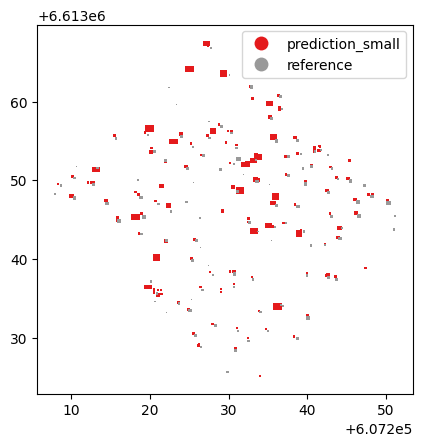

In [ ]:
# Scatter plot with colored points based on the attribute column
df_krakstad_small.plot(column = "category", markersize = 1, cmap = "Set1", legend = True)

# Show the plot
plt.show()

## Hobol

In [ ]:
for aoi in aois_hobol.iterrows():
    aoi_geom = aoi[1].geometry
    pred_within_aoi = pred_boxes_hobol[pred_boxes_hobol.geometry.within(aoi_geom)]
    pred_within_aoi_small = pred_boxes_hobol_small[pred_boxes_hobol_small.geometry.within(aoi_geom)]
    ref_within_aoi = ref_boxes[ref_boxes.geometry.within(aoi_geom)]

In [ ]:
pred_within_aoi = pred_within_aoi.assign(category = "prediction", model = "full")
pred_within_aoi_small = pred_within_aoi_small.assign(category = "prediction_small", model = "small")
ref_within_aoi = ref_within_aoi.assign(category = "reference", model = "")

In [ ]:
df_hobol_full = pd.concat([pred_within_aoi, ref_within_aoi])
df_hobol_small = pd.concat([pred_within_aoi_small, ref_within_aoi])

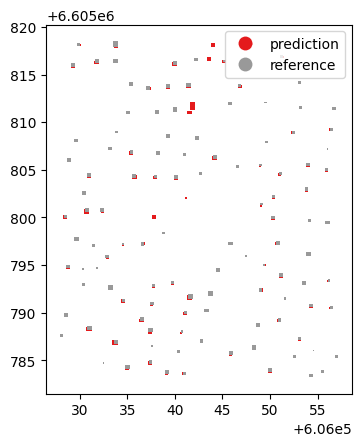

In [ ]:
# Scatter plot with colored points based on the attribute column
df_hobol_full.plot(column = "category", markersize = 1, cmap = "Set1", legend = True)

# Show the plot
plt.show()

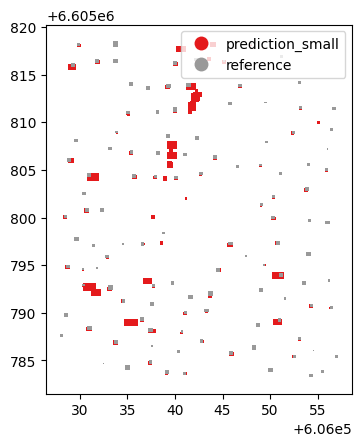

In [ ]:
# Scatter plot with colored points based on the attribute column
df_hobol_small.plot(column = "category", markersize = 1, cmap = "Set1", legend = True)

# Show the plot
plt.show()